# Data Diri
Nama : David William Tanto, Oei

# 1. Import Module

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
%matplotlib inline

# 2. Mount Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 3. Import Dataset

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Indosat/kursus4/NLP/spam.csv', encoding="ISO-8859-1")

In [4]:
data.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
data.tail(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
print("Dataset size:", len(data))

Dataset size: 5572


## Description Data

Understand the distribution better

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Number of ham and spam messages')

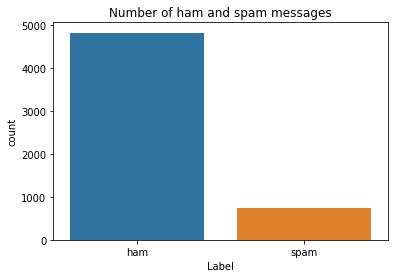

In [8]:
sns.countplot(data.v1)
plt.xlabel('Label')
plt.title('Number of ham and spam messages')

# 3. Preprocessing

## Label Encoder

1.   Create input and output vectors.
2.   Process the labels.

In [9]:
X = data.v2
Y = data.v1
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

# 4. Training Data

Split into training and test data.

In [10]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.20)

**Process the data**
*   Tokenize the data and convert the text to sequences.
*   Add padding to ensure that all the sequences have the same shape.
*   There are many ways of taking the max_len and here an arbitrary length of 150 is chosen.




In [11]:
max_words = 1000
max_len = 150
tok = Tokenizer(num_words = max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = pad_sequences(sequences, maxlen = max_len)

## LSTM Model

In [12]:
from keras.models import Sequential

In [13]:
def RNN():
    inputs = Input(name='inputs',shape = [max_len])
    layer = Embedding(max_words, 50, input_length = max_len)(inputs)
    layer = LSTM(200)(layer)
    layer = Dense(256, name = 'FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.2)(layer)
    layer = Dense(1, name = 'out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model = Model(inputs=inputs,outputs=layer)
    return model

In [14]:
model = RNN()
model.summary()
model.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(),
              metrics = ['accuracy'])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 200)               200800    
                                                                 
 FC1 (Dense)                 (None, 256)               51456     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

## Visualisasi Model

In [15]:
import tensorflow as tf

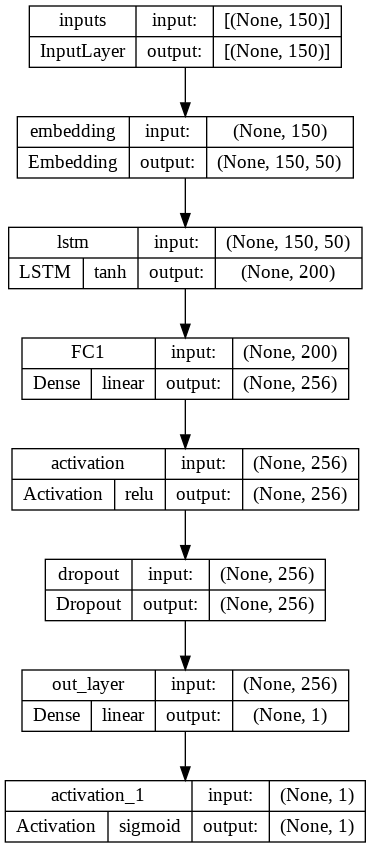

In [16]:
tf.keras.utils.plot_model(model, 
                          show_shapes = True, 
                          show_dtype = False, 
                          show_layer_names = True, 
                          expand_nested = True, 
                          show_layer_activations = True)

In [17]:
hist = model.fit(sequences_matrix, Y_train,
                 batch_size = 200,
                 epochs = 10,
                 validation_split = 0.2,
                 callbacks = [EarlyStopping(monitor = 'val_loss',
                                            min_delta = 0.0001)])

Epoch 1/10
18/18 [==============================] - 12s 154ms/step - loss: 0.4417 - accuracy: 0.8659 - val_loss: 0.3513 - val_accuracy: 0.9765
Epoch 2/10
18/18 [==============================] - 1s 46ms/step - loss: 0.1460 - accuracy: 0.9635 - val_loss: 0.0696 - val_accuracy: 0.9832


In [18]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = pad_sequences(test_sequences, maxlen = max_len)

## Evaluate Model

In [19]:
score_training = model.evaluate(sequences_matrix, Y_train, verbose = 1)
print('Training loss :', score_training) 

140/140 [==============================] - 1s 10ms/step - loss: 0.0671 - accuracy: 0.9843
Training loss : [0.06707918643951416, 0.9842943549156189]


In [20]:
score_testing = model.evaluate(test_sequences_matrix,Y_test)
print('Test loss :', score_testing)

35/35 [==============================] - 1s 14ms/step - loss: 0.0872 - accuracy: 0.9758
Test loss : [0.08718549460172653, 0.9757847785949707]


## Visualisasi Training Model Loss

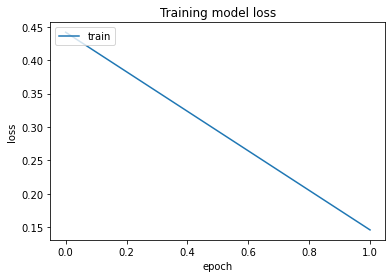

In [21]:
plt.plot(hist.history['loss'])
plt.title('Training model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()